## Problem Statement¶
The objective of this assignment is to utilize XGBoost classification modeling techniques with hyper-parameter tuning to predict survival rate based on historical data. By exploring the datasets and employing XGBoost classification to generate accurate predictions and evaluate the model's performance.

In [1]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler  # scales features using statistics that are robust to outliers
from sklearn.preprocessing import StandardScaler

 ### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

In [2]:
# Load the Titanic_Train dataset
X_train = pd.read_csv('Assignmet _Data/Titanic Data/train.csv')
X_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


### Data Dictionary
####    Variable	/  Definition	  /      Key
#### 1) survival 	/ Survival 	    0 = No, 1 = Yes
#### 2) pclass   /  Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
#### 3) sex 	   / male , Female.. Sex 	
#### 4) Age 	/    Age in years 	
#### 5) sibsp 	    # of siblings / spouses aboard the Titanic 	
#### 6) parch 	    # of parents / children aboard the Titanic 	
#### 7) ticket 	 /   Ticket number 	
#### 8) fare 	   /  Passenger fare 	
#### 9) cabin 	   /  Cabin number 	
#### 10) embarked 	/  Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
X_train.isnull().sum() # To check the missing values in the data set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [4]:
# Load the Titanic_Test dataset (New set of data containing independent variables)
X_test= pd.read_csv('Assignmet _Data/Titanic Data/test.csv')
X_test.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [5]:
X_test.isnull().sum() # To check the missing values in the data set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [6]:
# New set of data containing Dependend variables (i.e. survival details ) w.r.t. X_test datas....
y_test= pd.read_csv('Assignmet _Data/Titanic Data/gender_submission.csv')
y_test.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [7]:
X_train.shape , X_test.shape , y_test.shape

((891, 12), (418, 11), (418, 2))

#### Asper the details & shape of the data set following are the observations:
##### 1) X_train - contains both indep. & depnd..feature which needs for training the models
##### 2) X_test - contains only indep..feature & y_test - contains only depnd..features  which helps for model evaluation.

##### Hence befor proceed further we need to handel the missing values in both X_train & y_train data set... SO here we combine these two data set in a single data frame to perform EDA to treat missing features and outliers 

#### Check Column Names in a proper order, befor Concat (Combine) X_train & Y_train Data 

In [8]:
X_train.columns , X_test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

#### in the X_train data set "Survived" is the dependent deature, Which should be in the last column and rest indep.. features are on it's right side.

In [9]:
# Assuming df is your DataFrame
X_train['NewOrder'] = X_train['Survived']  # Creating a new column with the values of the 2nd column
X_train = X_train.drop('Survived', axis=1)  # Dropping the 2nd column from its original position
X_train = X_train.rename(columns={'NewOrder': 'Survived'})  # Renaming the new column to the original column name

# Now, 'Survived' will be the last column in the DataFrame


In [10]:
# This line of code essentially counts the number of columns that are different between X_train and Y_train excluding the last column from X_train.
# It could be useful for checking column mismatches or inconsistencies between the two datasets.
(X_train.columns[:-1]!=X_test.columns).sum()

0

In [11]:
# Merging these two data set into a single data set.
df = pd.concat([X_train, X_test],ignore_index=True, sort = False )
df.shape

(1309, 12)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000


In [13]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
# Check for missing values
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [15]:
 df.describe(exclude=np.number).T  ## describe the catagoriccal variables on the data set...

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


In [16]:
# Review the 'Object type' features only form the data set. 
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1309 non-null   object
 1   Sex       1309 non-null   object
 2   Ticket    1309 non-null   object
 3   Cabin     295 non-null    object
 4   Embarked  1307 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

### Treating Missing Values on the data set

In [18]:
# Treating the numerical missing feature with mean() values of the resective feature 
for col in df.columns[:-1]:  # Exclude the last column
    if df[col].dtype != 'object' and df[col].isna().sum() > 0:
        df[col].fillna(value=df[col].mean(), inplace=True)

In [19]:
df['Age'] = df['Age'].round()
df['Age'].unique()

array([22., 38., 26., 35., 30., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74., 67., 76.])

In [20]:
## Ages are in the form of int. asper the age group catagorise the age, to reduce the age as an outlier.....
age_ranges = [(0, 12), (13, 18), (19, 35), (36, 60), (61, 100)]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create a new column 'AgeGroup' with the assigned age group labels
df['Age'] = pd.cut(df['Age'], bins=[age_range[0] - 1 for age_range in age_ranges] + [age_ranges[-1][1]], right=True, labels=age_labels)

# Display the updated DataFrame
df.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,Young Adult,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,Young Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young Adult,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,Young Adult,0,0,373450,8.0500,NaN,S,0.0
5,6,3,"Moran, Mr. James",male,Young Adult,0,0,330877,8.4583,NaN,Q,0.0
6,7,1,"McCarthy, Mr. Timothy J",male,Adult,0,0,17463,51.8625,E46,S,0.0
7,8,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,NaN,S,0.0


In [21]:
# Check the distribution of 'Embarked'
print(df['Embarked'].value_counts())

# Fill missing values in 'Embarked' with the most frequent value (mode)
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Verify that there are no missing values after filling
print(df['Embarked'].isnull().sum())


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64
0


In [22]:
# Create a new column 'Cabin_Missing' indicating whether have the cabin facility or not
df['Cabin_Missing'] = df['Cabin'].isnull().astype(int)

# Display the updated DataFrame
print(df[['Cabin', 'Cabin_Missing']].head())


  Cabin  Cabin_Missing
0   NaN              1
1   C85              0
2   NaN              1
3  C123              0
4   NaN              1


In [23]:
# After collecting the information ther is mo need of Cabin column, Hence : Drop the original 'Cabin' column .
df.drop('Cabin', axis=1, inplace=True)

In [24]:
# Mapping Pclass to Class
class_mapping = {1: '1st_class', 2: '2nd_class', 3: '3rd_class'}

# Apply the mapping to create a new 'Class' column
df['Pclass'] = df['Pclass'].map(class_mapping)

# Display the updated DataFrame
df.sample(8)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin_Missing
1192,1193,2nd_class,"Malachard, Mr. Noel",male,Young Adult,0,0,237735,15.0458,C,NaN,0
238,239,2nd_class,"Pengelly, Mr. Frederick William",male,Young Adult,0,0,28665,10.5000,S,0.0,1
427,428,2nd_class,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,Young Adult,0,0,250655,26.0000,S,1.0,1
15,16,2nd_class,"Hewlett, Mrs. (Mary D Kingcome)",female,Adult,0,0,248706,16.0000,S,1.0,1
1103,1104,2nd_class,"Deacon, Mr. Percy William",male,Teenager,0,0,S.O.C. 14879,73.5000,S,NaN,1
390,391,1st_class,"Carter, Mr. William Ernest",male,Adult,1,2,113760,120.0000,S,1.0,0
723,724,2nd_class,"Hodges, Mr. Henry Price",male,Adult,0,0,250643,13.0000,S,0.0,1
20,21,2nd_class,"Fynney, Mr. Joseph J",male,Young Adult,0,0,239865,26.0000,S,0.0,1


In [25]:
# Check for missing values
df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Survived         418
Cabin_Missing      0
dtype: int64

In [26]:
# Create a new feature 'Family_Size' condidering the following feature columns :
# " sibsp "  # of siblings / spouses aboard the Titanic 
# and " parch " # of parents / children aboard the Titanic
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Display the updated DataFrame
print(df[['SibSp', 'Parch', 'Family_Size']].head())
# whith this feature we can calculate how many members are travelng is each ticket ID


   SibSp  Parch  Family_Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


In [27]:
df.sample(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Cabin_Missing,Family_Size
161,162,2nd_class,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,Adult,0,0,C.A. 33595,15.750,S,1.0,1,1
110,111,1st_class,"Porter, Mr. Walter Chamberlain",male,Adult,0,0,110465,52.000,S,0.0,0,1
257,258,1st_class,"Cherry, Miss. Gladys",female,Young Adult,0,0,110152,86.500,S,1.0,0,1
589,590,3rd_class,"Murdlin, Mr. Joseph",male,Young Adult,0,0,A./5. 3235,8.050,S,0.0,1,1
274,275,3rd_class,"Healy, Miss. Hanora ""Nora""",female,Young Adult,0,0,370375,7.750,Q,1.0,1,1
1112,1113,3rd_class,"Reynolds, Mr. Harold J",male,Young Adult,0,0,342684,8.050,S,NaN,1,1
575,576,3rd_class,"Patchett, Mr. George",male,Young Adult,0,0,358585,14.500,S,0.0,1,1
129,130,3rd_class,"Ekstrom, Mr. Johan",male,Adult,0,0,347061,6.975,S,0.0,1,1


## Data Visualisasion

In [28]:
# Calculate and print the exact numbers of survivals..?
survived_count = df['Survived'].sum()
died_count = df['Survived'].count() - survived_count

print(f'Number of Passengers Survived: {survived_count}')
print(f'Number of Passengers Died: {died_count}')

Number of Passengers Survived: 342.0
Number of Passengers Died: 549.0


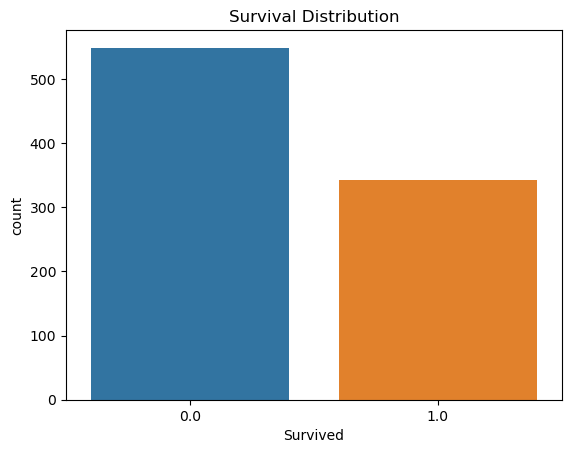

In [29]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

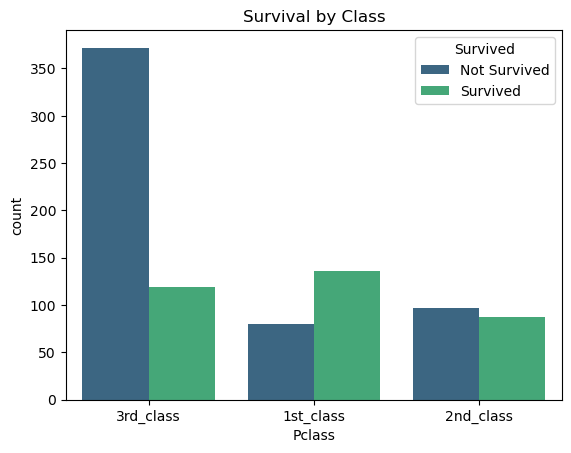

In [30]:
# Exclude rows where 'Survived' is null
df_1 = df.dropna(subset=['Survived']) # here by rmoving the X_test data sets to visulise the exact data of the survival 

# Convert 'Survived' column to categorical with labels 'Survived' and 'Not Survived'
df_1.loc[:, 'Survived'] = df_1['Survived'].apply(lambda x: 'Survived' if x == 1.0 else 'Not Survived')

# Create countplot
sns.countplot(x='Pclass', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [31]:
class_survived = pd.crosstab(df_1['Pclass'], df_1['Survived'])
print(class_survived)

Survived   Not Survived  Survived
Pclass                           
1st_class            80       136
2nd_class            97        87
3rd_class           372       119


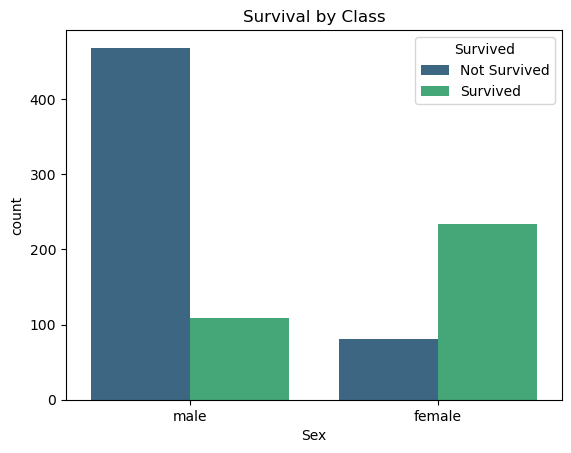

In [32]:
# Create countplot
sns.countplot(x='Sex', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [33]:
class_survived = pd.crosstab(df_1['Sex'], df_1['Survived'])
print(class_survived)

Survived  Not Survived  Survived
Sex                             
female              81       233
male               468       109


/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/debasish/anaconda3/envs/new_env39/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


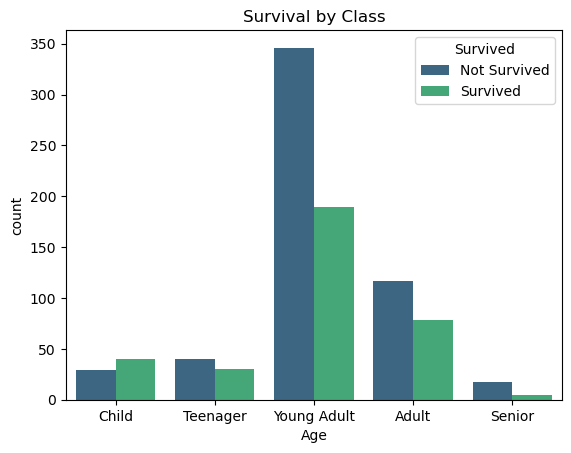

In [34]:
# Create countplot
sns.countplot(x='Age', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [35]:
class_survived = pd.crosstab(df_1['Age'],df_1['Survived'])
print(class_survived)

Survived     Not Survived  Survived
Age                                
Child                  29        40
Teenager               40        30
Young Adult           346       189
Adult                 117        78
Senior                 17         5


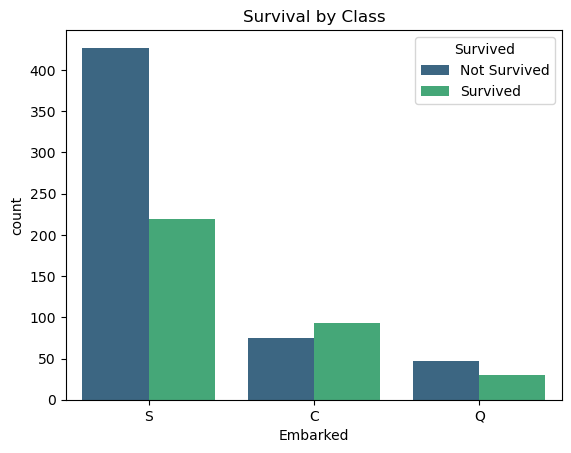

In [36]:
# Create countplot
sns.countplot(x='Embarked', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [37]:
class_survived = pd.crosstab(df_1['Embarked'],df_1['Survived'])
print(class_survived)

Survived  Not Survived  Survived
Embarked                        
C                   75        93
Q                   47        30
S                  427       219


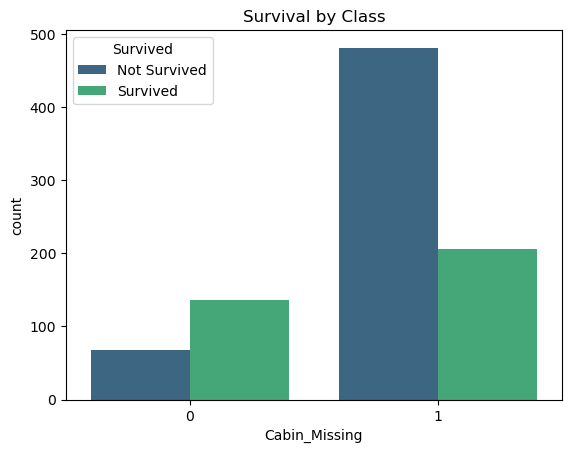

In [38]:
# Create countplot
sns.countplot(x='Cabin_Missing', hue='Survived', palette='viridis', data=df_1)
plt.title('Survival by Class')
plt.show()

In [39]:
class_survived = pd.crosstab(df_1['Cabin_Missing'],df_1['Survived'])
print(class_survived)

Survived       Not Survived  Survived
Cabin_Missing                        
0                        68       136
1                       481       206


### Perform data exploration for outlier Detection

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.0,328.0000,655.0000,982.000,1309.0000
SibSp,1309.0,0.498854,1.041658,0.0,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.0,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.295479,51.738879,0.0,7.8958,14.4542,31.275,512.3292
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.000,1.0000
Cabin_Missing,1309.0,0.774637,0.417981,0.0,1.0000,1.0000,1.000,1.0000
Family_Size,1309.0,1.883881,1.583639,1.0,1.0000,1.0000,2.000,11.0000


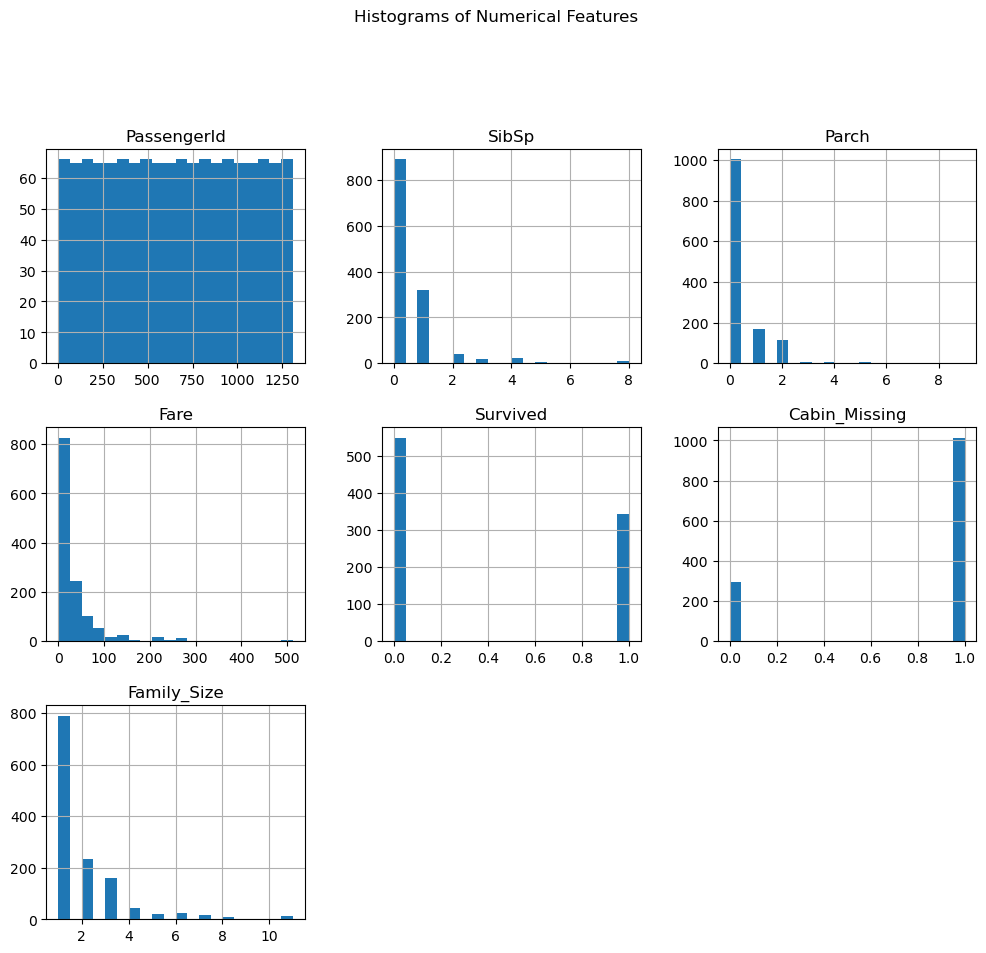

In [41]:
### Display histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

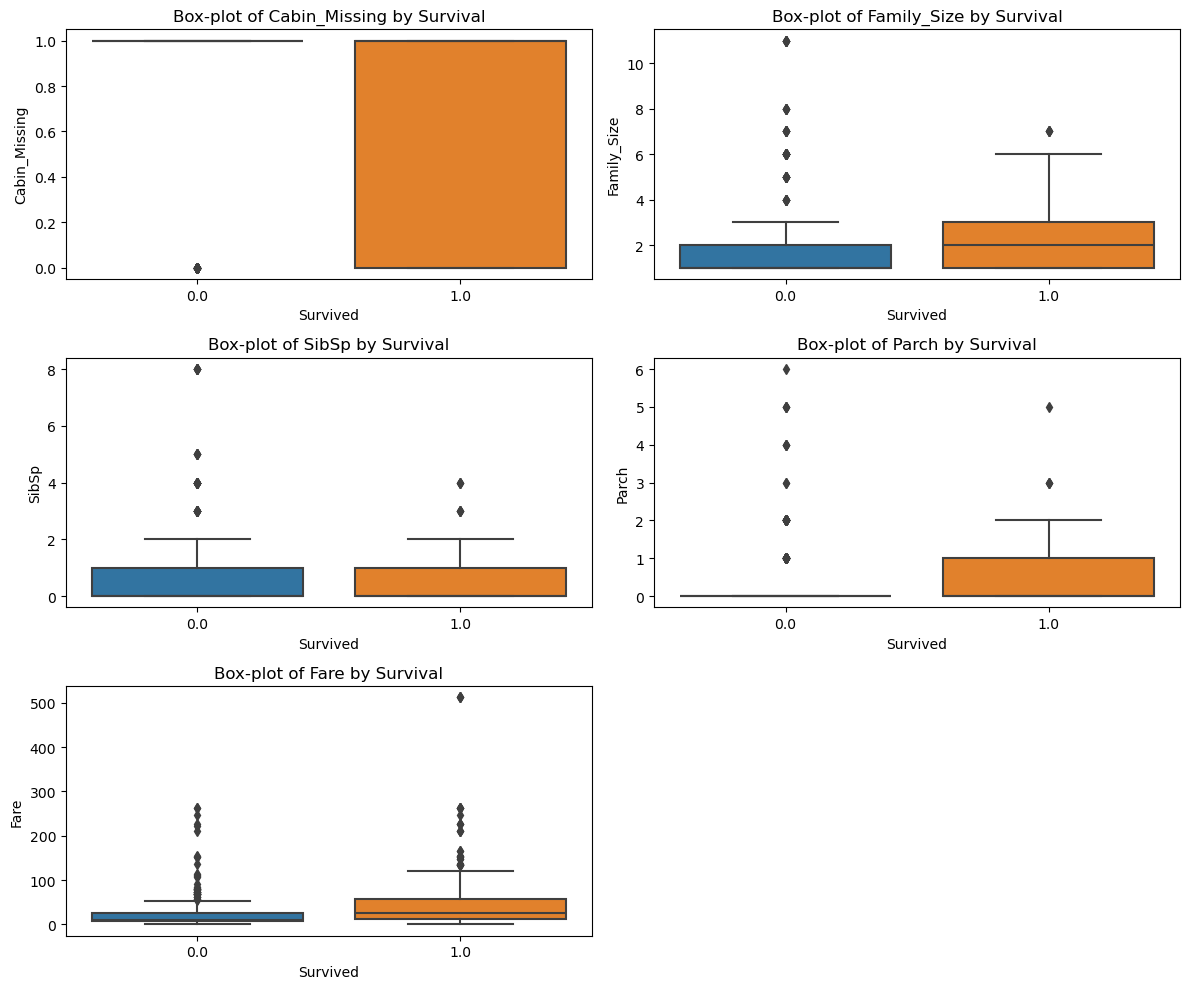

In [42]:
# Display box-plots for numerical features
numerical_features = ['Cabin_Missing', 'Family_Size', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Survived', y=feature, data=df)
    plt.title(f'Box-plot of {feature} by Survival')
plt.tight_layout()
plt.show()


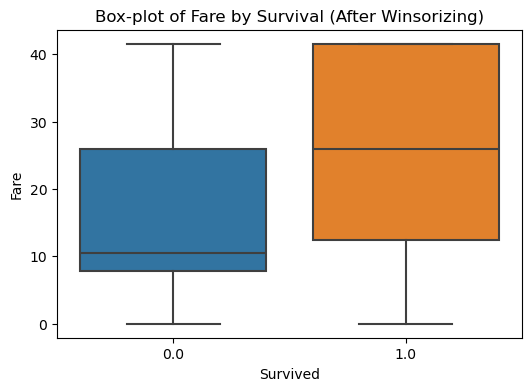

In [43]:
# Calculate the 95th percentile of Fare to rduce the outlier on the data set
fare_threshold = df['Fare'].quantile(0.80)
fare_threshold
# Winsorize the 'Fare' feature
df['Fare'] = df['Fare'].clip(upper=fare_threshold)

# Display box-plot after winsorizing
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box-plot of Fare by Survival (After Winsorizing)')
plt.show()

In [44]:
# Calculate the 95th percentile of Fare to rduce the outlier on the data set
fare_threshold = df['Family_Size'].quantile(0.80)
fare_threshold
# Winsorize the 'Fare' feature
df['Family_Size'] = df['Family_Size'].clip(upper=fare_threshold)

In [45]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Cabin_Missing',
       'Family_Size'],
      dtype='object')

In [46]:
df = pd.get_dummies(df, columns=['Pclass','Sex','Age', 'Embarked'])

In [47]:
# List of boolean columns to convert to numeric
bool_columns = ['Pclass_1st_class', 'Pclass_2nd_class', 'Pclass_3rd_class', 'Age_Teenager', 'Sex_female','Age_Young Adult',  'Sex_male', 'Age_Child', 'Age_Adult', 'Age_Senior','Embarked_S','Embarked_C','Embarked_Q']

# Convert boolean columns to numeric
df[bool_columns] = df[bool_columns].astype(int)

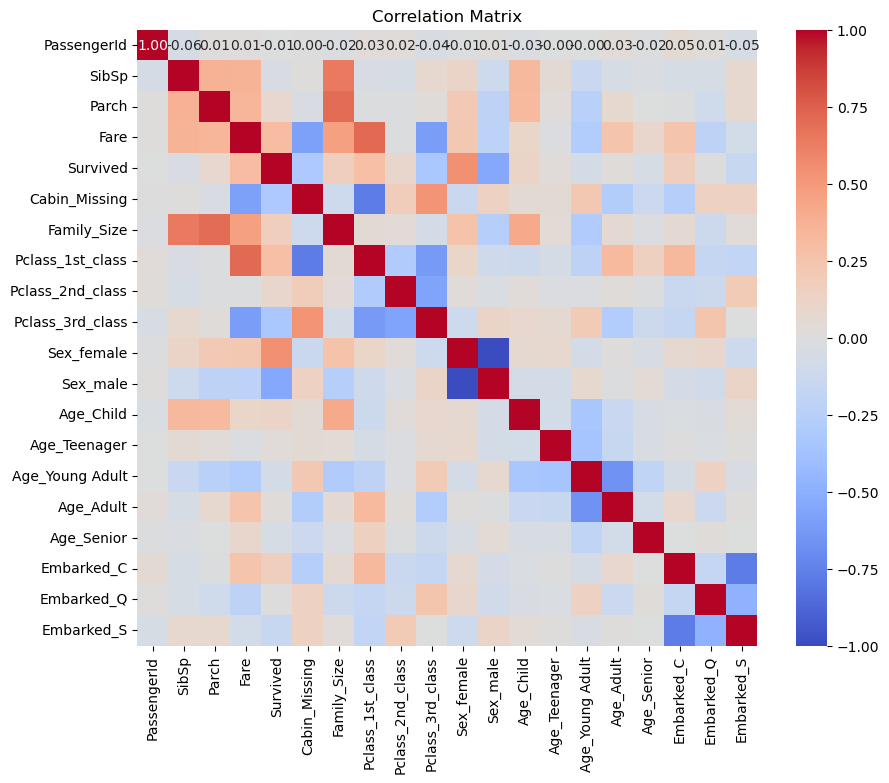

In [48]:
# Exclude non-numeric columns when calculating the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Drop 'Name' and 'Ticket' columns from df_combined
df = df.drop(columns=['Name', 'Ticket','PassengerId' ])

In [50]:

# Separate df_combined back into train_data and test_data based on the 'Survived' column
x_train = df[df['Survived'].notnull()]
x_test = df[df['Survived'].isnull()].drop(columns=['Survived'])

# Display the shapes of the resulting DataFrames
print("Train Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)


Train Data Shape: (891, 19)
Test Data Shape: (418, 18)


In [51]:
# Shoftong the 'Survived' cloumn to the last last clomn. form the middle.(as it's contain target variables )
x_train['NewOrder'] = x_train['Survived'].copy()
x_train = x_train.drop('Survived', axis=1)
x_train['Survived'] = x_train['NewOrder']
x_train = x_train.drop('NewOrder', axis=1)

/tmp/ipykernel_5357/1527080333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['NewOrder'] = x_train['Survived'].copy()


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             891 non-null    int64  
 1   Parch             891 non-null    int64  
 2   Fare              891 non-null    float64
 3   Cabin_Missing     891 non-null    int64  
 4   Family_Size       891 non-null    int64  
 5   Pclass_1st_class  891 non-null    int64  
 6   Pclass_2nd_class  891 non-null    int64  
 7   Pclass_3rd_class  891 non-null    int64  
 8   Sex_female        891 non-null    int64  
 9   Sex_male          891 non-null    int64  
 10  Age_Child         891 non-null    int64  
 11  Age_Teenager      891 non-null    int64  
 12  Age_Young Adult   891 non-null    int64  
 13  Age_Adult         891 non-null    int64  
 14  Age_Senior        891 non-null    int64  
 15  Embarked_C        891 non-null    int64  
 16  Embarked_Q        891 non-null    int64  
 17  Em

In [53]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 891 to 1308
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             418 non-null    int64  
 1   Parch             418 non-null    int64  
 2   Fare              418 non-null    float64
 3   Cabin_Missing     418 non-null    int64  
 4   Family_Size       418 non-null    int64  
 5   Pclass_1st_class  418 non-null    int64  
 6   Pclass_2nd_class  418 non-null    int64  
 7   Pclass_3rd_class  418 non-null    int64  
 8   Sex_female        418 non-null    int64  
 9   Sex_male          418 non-null    int64  
 10  Age_Child         418 non-null    int64  
 11  Age_Teenager      418 non-null    int64  
 12  Age_Young Adult   418 non-null    int64  
 13  Age_Adult         418 non-null    int64  
 14  Age_Senior        418 non-null    int64  
 15  Embarked_C        418 non-null    int64  
 16  Embarked_Q        418 non-null    int64  
 17 

In [54]:
x_train['Survived'] = x_train['Survived'].astype(int)
x_train['Survived'].dtype

dtype('int64')

In [55]:
x_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

##  Model Building and Hyper-Parameter Tuning
- Split the dataset into training and testing sets.
- Initialize an XGBoost classifier model.
- Tune hyper-parameters using techniques like grid search or random search.
- Utilize cross-validation for robust parameter selection.

In [56]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = x_train.drop(columns=['Survived'])  # Features
y = x_train['Survived']  # Target variable

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train Shape:", x1_train.shape)
print("X_test Shape:", x1_test.shape)
print("y_train Shape:", y1_train.shape)
print("y_test Shape:", y1_test.shape)


X_train Shape: (712, 18)
X_test Shape: (179, 18)
y_train Shape: (712,)
y_test Shape: (179,)


In [57]:
x1_train.columns

Index(['SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Family_Size',
       'Pclass_1st_class', 'Pclass_2nd_class', 'Pclass_3rd_class',
       'Sex_female', 'Sex_male', 'Age_Child', 'Age_Teenager',
       'Age_Young Adult', 'Age_Adult', 'Age_Senior', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [58]:
y1_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [59]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [60]:
# Define the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Let’s look at the overview of the most frequently tuned hyperparameters:

1) learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.(typical values: 0.01–0.2 )

2) gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively

3)  typical values for gamma: 0 - 0.5 but highly dependent on the data typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data

4) max_depth - how deep the tree's decision nodes can go. Must be a positive integer, typical values: 1–10

5) subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting , typical values: 0.5–0.9

6) colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree , typical values: 0.5–0.9

#### The above are the main hyperparameters people often tune.

In [61]:
# Define the hyperparameter grid to search
param = {
    'learning_rate': [0.1 , 0.2],
    'n_estimators': [50, 100],
    'max_depth': [5, 10],  # Adjusted based on typical values
    'subsample': [0.5, 0.9],  # Adjusted based on typical values
    'colsample_bytree': [0.5, 0.6],  # Adjusted based on typical values
    'gamma': [0.2, 0.3 ],  # Adjusted based on typical values
    'reg_alpha': [0, 0.5],  # Adjusted based on typical values
    'reg_lambda': [0.5 , 1 ],  # Adjusted based on typical values
}

### Use GridSearchCV to find the best hyperparameters

In [62]:
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param,
    scoring='accuracy',  # Use an appropriate scoring metric for your problem
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use -1 to use all available CPU cores
)

In [63]:
# Fit the grid search to the data
grid_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.1s
[CV] END colsamp

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6], 'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [50, 100], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [0.5, 1], 'subsample': [0.5, 0.9]},
             scoring='accuracy', verbose=2)

In [81]:
# Get the best hyperparameters
best_params1 = grid_search.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.9}


In [65]:
# Evaluate the model with the best hyperparameters on the test set
best_model1 = grid_search.best_estimator_

In [66]:
y_pred1 = best_model1.predict(x1_test)

In [67]:
Gcv_accuracy = accuracy_score(y1_test, y_pred1)*100
print("Test Accuracy:", Gcv_accuracy)

Test Accuracy: 81.00558659217877


### Use RandomizedSearchCV to find the best hyperparameters

In [68]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param,
    n_iter=20,  # Adjust the number of iterations as needed
    scoring='accuracy',  # Use an appropriate scoring metric for your problem
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use -1 to use all available CPU cores
    random_state=42,  # Set a random seed for reproducibility
)

In [69]:
# Fit the randomized search to the data
random_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.2s
[CV] END c

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6],
                                        'gamma': [0.2, 0.3],
                                        'learning_rate': [0.1, 0.2],
                                        'max_depth': [5, 10],
                                        'n_estimators': [50, 100],
                                        'reg_alpha': [0, 0.5],
                                        'reg_lambda': [0.5, 1],
                                        'subsample': [0.5, 0.9]},
                   random_state=42, scoring='accuracy', verbose=2)

In [70]:
# Get the best hyperparameters
best_params2 = random_search.best_params_
print("Best Hyperparameters:", best_params2)

Best Hyperparameters: {'subsample': 0.5, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [71]:
# Evaluate the model with the best hyperparameters on the test set
best_model2 = random_search.best_estimator_
y_pred2 = best_model2.predict(x1_test)
Rscv_accuracy = accuracy_score(y1_test, y_pred2)*100
print("Test Accuracy:", Rscv_accuracy)

Test Accuracy: 81.00558659217877


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [74]:
# Predictions on the test set
y_pred2 = best_model2.predict(x1_test)
y_proba = best_model2.predict_proba(x1_test)[:, 1]

In [82]:
# Evaluate the model's performance

precision = precision_score(y1_test, y_pred2)
recall = recall_score(y1_test, y_pred2)
f1 = f1_score(y1_test, y_pred2)
roc_auc = roc_auc_score(y1_test, y_proba)

In [86]:
# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, y_pred2)

print("Precision:", precision)

print("Recall:", recall)

print("F1 Score:", f1)

print("ROC AUC Score:", roc_auc)

print("Confusion Matrix:")

print(conf_matrix)

Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
ROC AUC Score: 0.893050193050193
Confusion Matrix:
[[91 14]
 [20 54]]


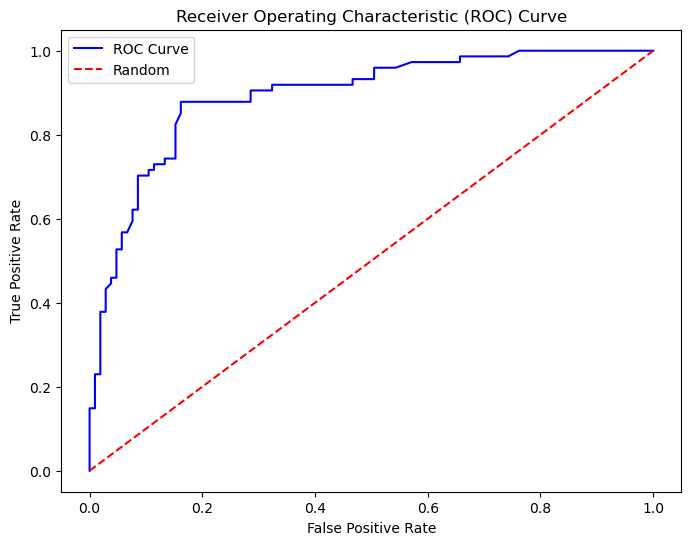

In [84]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y1_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Strengths of XGBoost Classifier:

    High Performance: XGBoost is known for its high performance and is often a top choice in various machine learning competitions.

    Regularization: XGBoost includes built-in regularization techniques, making it less prone to overfitting.

    Feature Importance: XGBoost provides a clear indication of feature importance, aiding in model interpretation.
### Limitations of XGBoost Classifier:

    Computational Complexity: Training an XGBoost model can be computationally expensive, especially for large datasets.

    Black-Box Nature: Despite providing feature importance, XGBoost is still considered a black-box model, making it challenging to interpret complex interactions between features.

    Sensitive to Hyperparameters: Performance heavily depends on tuning hyperparameters. Finding the optimal set requires significant effort.